# Support Vector Machines

First, load the standard packages.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import svm

%matplotlib inline

Read the 'quidditch_training.csv' file into a Data Frame.

In [2]:
df = pd.read_csv("C:\\Users\\alexb\\Downloads\\qudditch_training.csv")
print(df.shape)

(101266, 48)


Get the rows and columns of the Data Frame to help split matrix into training and testing sets.

In [3]:
df1 = df.values
df1 = df1[:,2:]

Cleaning data for poorly structured features and irrelevant data.

In [4]:
for i in range(2):
    df1[:,13] += df1[:,14]
    df1 = np.delete(df1, [14], 1)

In [5]:
colDel = []
row, col = df1.shape

for i in range(row):
    for j in range(col):
        if df1[i][j] == '?':
            if j not in colDel:
                colDel.append(j)

In [6]:
i = 0
while (i != len(colDel)):
    df1 = np.delete(df1, colDel[i], 1)
    i += 1

Splitting the data by features and target values.

In [7]:
X = df1[:,:-1]
Y = df1[:,-1]

Creating training/test sets by splitting both X and Y sets. In addition, creating the penalty parameter, c, for the margin.

In [8]:
row, col = df1.shape
rowHalf = row//2

In [9]:
xTrain = X[:rowHalf]
yTrain = Y[:rowHalf]
xTest = X[rowHalf:]
yTest = Y[rowHalf:]

cMat = []
for i in range(11):
    cMat.append(10**(-i))

Addressing some format issues found in the last column for the feature matrix -- failure to convert 'Ch' and 'No' as valid inputs.

In [10]:
for i in range(len(X[:,-1])):
    if X[:,-1][i] == 'Ch':
        X[i] = 1
    else:
        X[i] = 0

In [11]:
accTrainSvm = []

In [12]:
accTestSvm = []

# Linear Kernel

SVM regression using a linear kernel.

In [13]:
def svmLinear(xTrain, yTrain, xTest, yTest, c):
    svc = svm.SVC(probability = False, kernel = 'linear', gamma='auto', C = c)
    
    svc.fit(xTrain, yTrain)
    
    yhatTrain = svc.predict(xTrain)
    accTrain = np.mean(yhatTrain == yTrain)
    
    accTrainSvm.append(accTrain)
    print("Train Accuracy = {0:f}".format(accTrain))
    
    yhatTest = svc.predict(xTest)
    accTest = np.mean(yhatTest == yTest)
    
    accTestSvm.append(accTest)
    print("Test Accuracy = {0:f}".format(accTest))

In [14]:
print(len(cMat))
for c in cMat:
    svmLinear(xTrain, yTrain, xTest, yTest, c)

11
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833


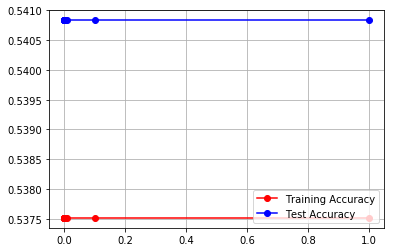

In [17]:
plt.plot(cMat, accTrainSvm, 'ro-')
plt.plot(cMat, accTestSvm, 'bo-')
plt.grid()
plt.legend(['Training Accuracy','Test Accuracy'], loc = 'lower right')

We reset the values for both the trained and tested accuracy matrices as well as the penalty matrix for reuse.

In [18]:
accTrainSvm.clear()
accTestSvm.clear()

# Radial Basis Function (RBF) Kernel

SVM regression using a RBF kernel.

In [19]:
def svmRBF(xTrain, yTrain, xTest, yTest, c):
    svc = svm.SVC(probability = False, kernel = 'rbf', gamma='auto', C = c)
    
    svc.fit(xTrain, yTrain)
    
    yhatTrain = svc.predict(xTrain)
    accTrain = np.mean(yhatTrain == yTrain)
    
    accTrainSvm.append(accTrain)
    print("Train Accuracy = {0:f}".format(accTrain))
    
    yhatTest = svc.predict(xTest)
    accTest = np.mean(yhatTest == yTest)
    
    accTestSvm.append(accTest)
    print("Test Accuracy = {0:f}".format(accTest))

In [20]:
for c in cMat:
    svmRBF(xTrain, yTrain, xTest, yTest, c)

Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833


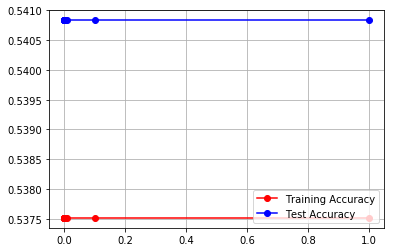

In [22]:
plt.plot(cMat, accTrainSvm, 'ro-')
plt.plot(cMat, accTestSvm, 'bo-')
plt.grid()
plt.legend(['Training Accuracy','Test Accuracy'], loc = 'lower right')

In [23]:
accTrainSvm.clear()
accTestSvm.clear()

# Polynomial Kernel

SVM regression using a polynomial kernel.

In [24]:
def svmPoly(xTrain, yTrain, xTest, yTest, c):
    svc = svm.SVC(probability = False, kernel = 'poly', gamma='auto', C = c)
    
    svc.fit(xTrain, yTrain)
    
    yhatTrain = svc.predict(xTrain)
    accTrain = np.mean(yhatTrain == yTrain)
    
    accTrainSvm.append(accTrain)
    print("Train Accuracy = {0:f}".format(accTrain))
    
    yhatTest = svc.predict(xTest)
    accTest = np.mean(yhatTest == yTest)
    
    accTestSvm.append(accTest)
    print("Test Accuracy = {0:f}".format(accTest))

In [25]:
for c in cMat:
    svmPoly(xTrain, yTrain, xTest, yTest, c)

Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833
Train Accuracy = 0.537515
Test Accuracy = 0.540833


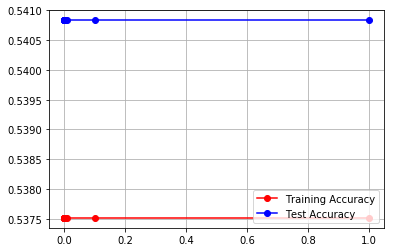

In [26]:
plt.plot(cMat, accTrainSvm, 'ro-')
plt.plot(cMat, accTestSvm, 'bo-')
plt.grid()
plt.legend(['Training Accuracy','Test Accuracy'], loc = 'lower right')